In [25]:
import pandas as pd
from jqdatasdk import *
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import tushare as ts
import mplfinance as mpf
import numpy as np

In [26]:
list= ['000089.XSHE', '000418.XSHE', '000681.XSHE', '000738.XSHE', '000830.XSHE', '000963.XSHE', '000999.XSHE', '002127.XSHE', '002242.XSHE', '002368.XSHE', '002371.XSHE', '002690.XSHE', '300003.XSHE', '300144.XSHE', '300383.XSHE', '300408.XSHE', '600062.XSHG', '600085.XSHG', '600104.XSHG', '600195.XSHG', '600221.XSHG', '600258.XSHG', '600298.XSHG', '600332.XSHG', '600352.XSHG', '600536.XSHG', '600572.XSHG', '600660.XSHG', '600809.XSHG', '600859.XSHG', '600887.XSHG', '601607.XSHG', '601901.XSHG', '603019.XSHG', '603288.XSHG', '603355.XSHG', '603877.XSHG', '603883.XSHG']

In [27]:
date = '2018-08-01'
predays = 90
afterdays =90

In [28]:
if len(list)!=0:
    d = {'code': list}
    edf = pd.DataFrame(d)
    date = datetime.strptime(date, "%Y-%m-%d")
    edf["time"]=date
edf

,code,time
0,000089.XSHE,2018-08-01
1,000418.XSHE,2018-08-01
2,000681.XSHE,2018-08-01
3,000738.XSHE,2018-08-01
4,000830.XSHE,2018-08-01
5,000963.XSHE,2018-08-01
6,000999.XSHE,2018-08-01
7,002127.XSHE,2018-08-01
8,002242.XSHE,2018-08-01
9,002368.XSHE,2018-08-01


In [29]:
def show_current(time,dfclose):
    import numpy as np
    signal   = []
    previous = -1.0
    for date,value in dfclose.iteritems():
        if time == date:
            signal.append(dfclose[date]*0.95)
        else:
            signal.append(np.nan)
    return signal

def drawing(code,start,end,time):
    # 获取数据
    df = ts.get_k_data(code,start,end)
    # 以 date 为索引
    df.set_index('date',inplace=True)
    # 转换为 DatetimeIndex索引
    df.index = pd.DatetimeIndex(df.index)
    # 提取出'open','high','low','close','volume'
    df = df[['open','high','low','close','volume']]
    # 转换表名
    df.columns = ['Open','High','Low','Close','Volume']
    print(len(df))
    if len(df)< (predays+afterdays)*0.6:
        return
    # 取出当天的close
#     close = df.loc[time,'Close']
    # 设置画图的参数
    '''
    type='candle' 画K线图
    mav=(5,10,20) 画出 5，10，20日均线
    '''
    kwargs = dict(type='candle',mav=(5,10,20),volume=False,figratio=(19,8),figscale=0.85)
    mc = mpf.make_marketcolors(up = 'r',down = 'g')#00ff00
    my_style = mpf.make_mpf_style(marketcolors=mc)
#     signal = [time,close]
#     signal =  [20]*len(df)
    # signal是一串列表
    signal = show_current(time,df.Close)
    if np.array(signal).all()==np.nan:
        return
    apd = mpf.make_addplot(signal,type='scatter',markersize=200,marker='^')
    mpf.plot(df,**kwargs,style=my_style,title='Candle:'+str(time)+' | '+code, ylabel='price', ylabel_lower='date',addplot=apd)#, savefig='my_image.png'
    plt.show() 

000089 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


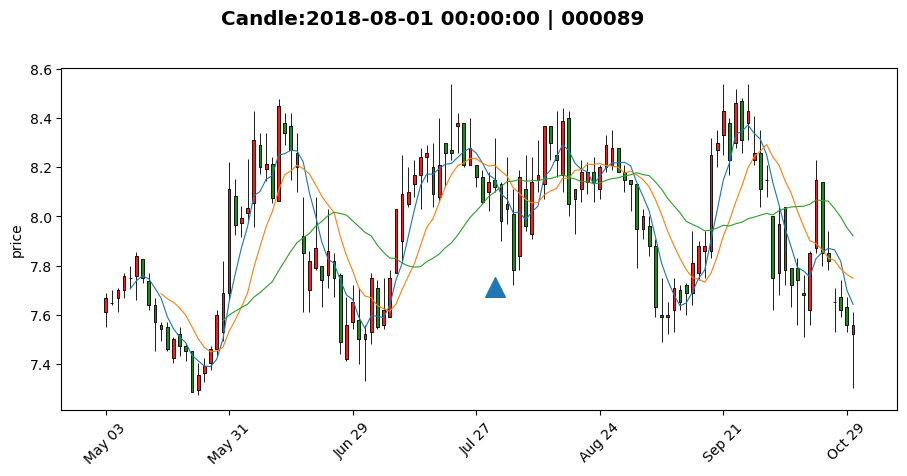

000418 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
93
000681 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


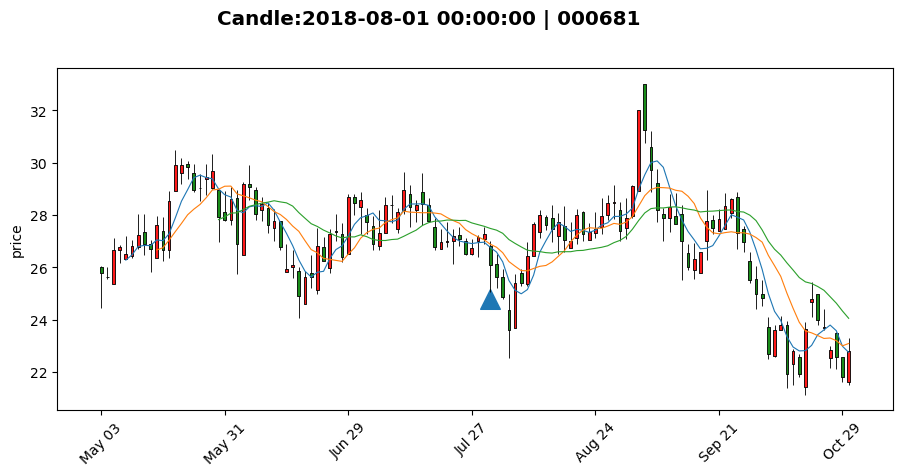

000738 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


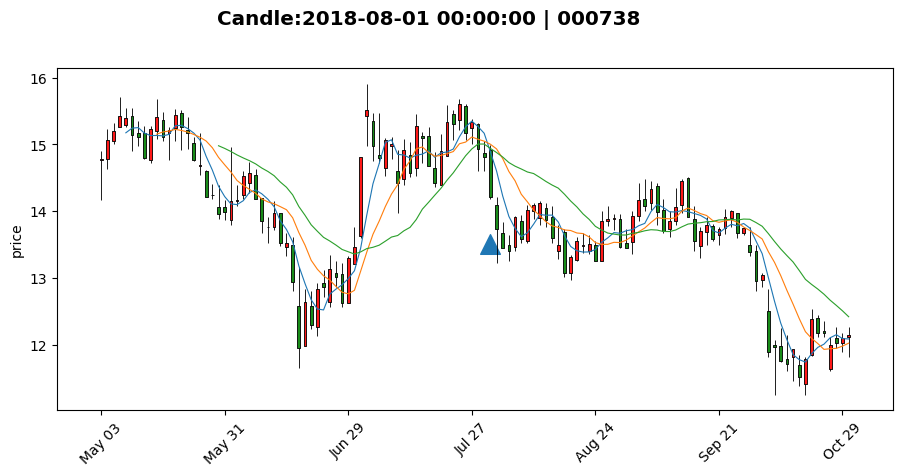

000830 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


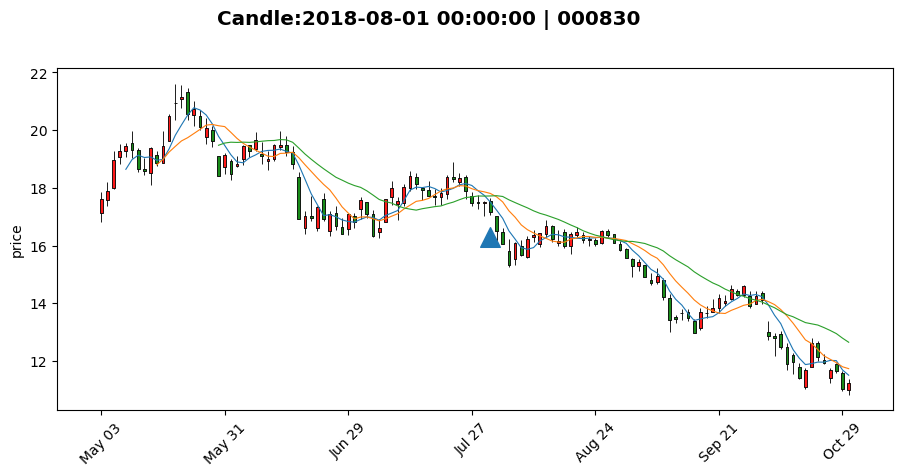

000963 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


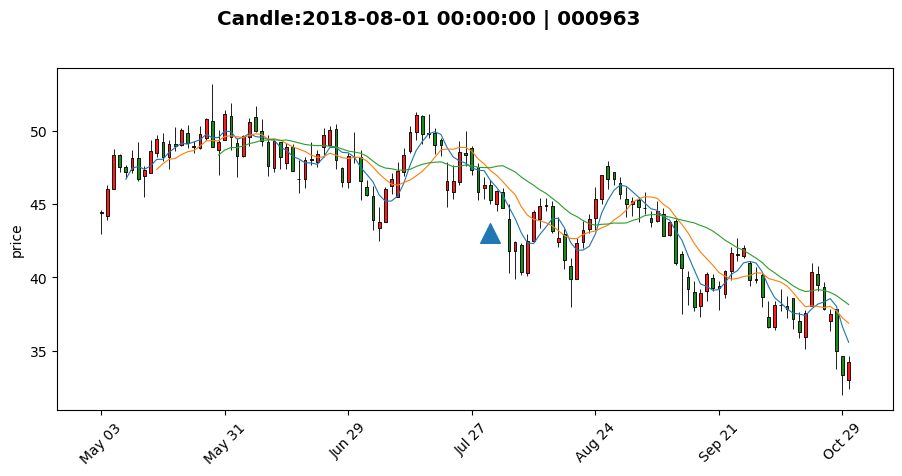

000999 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


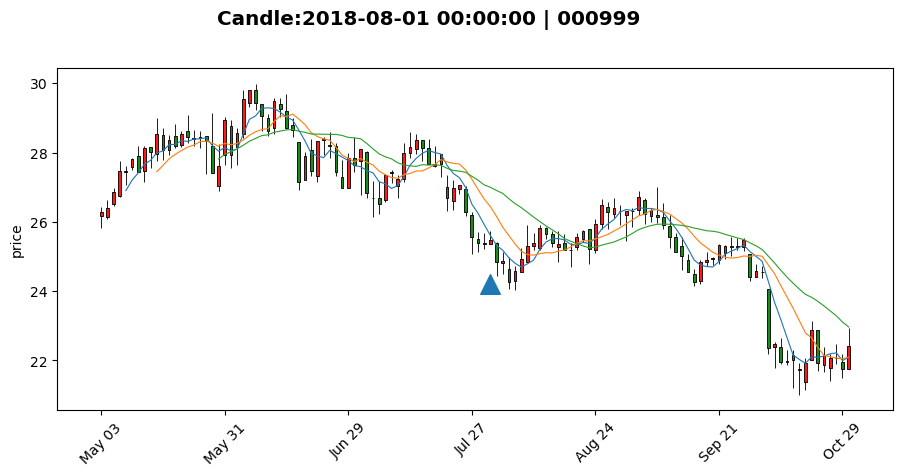

002127 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


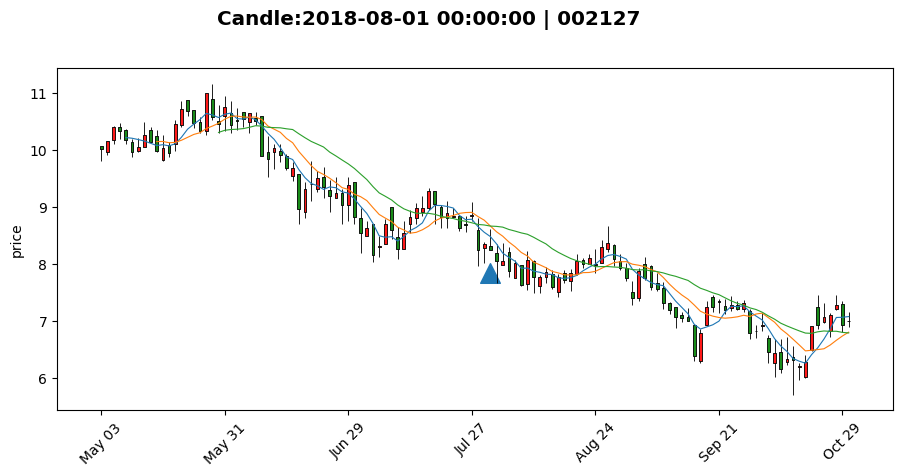

002242 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


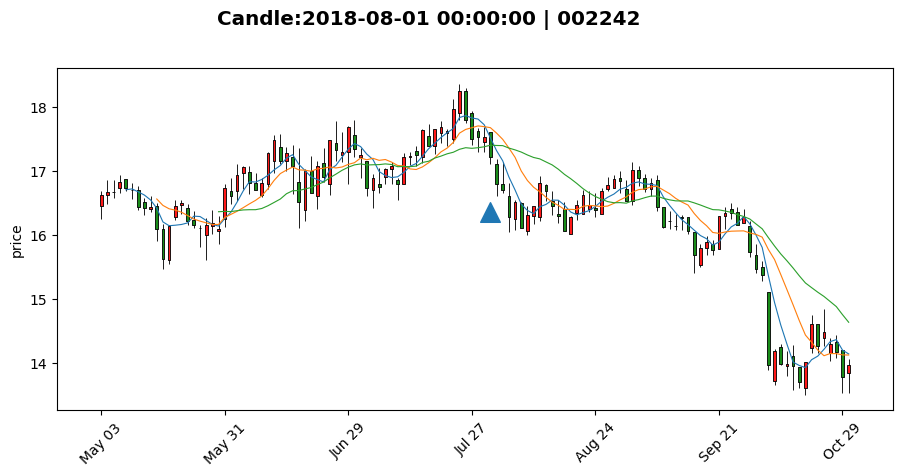

002368 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


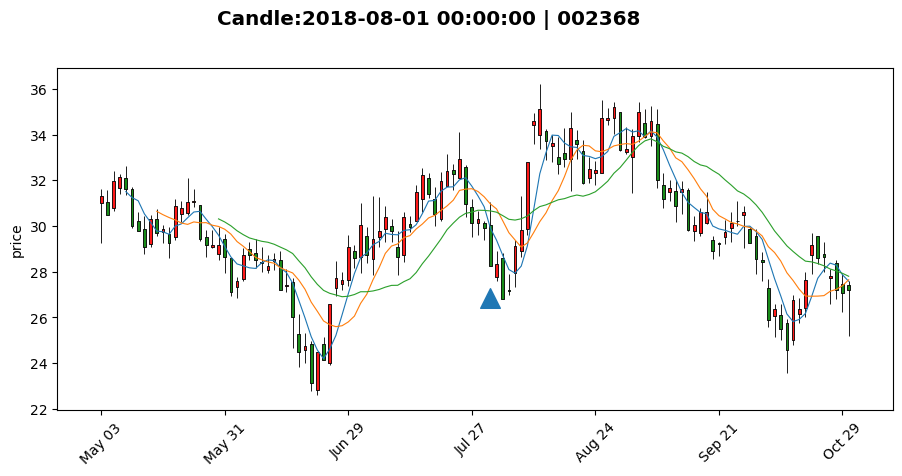

002371 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


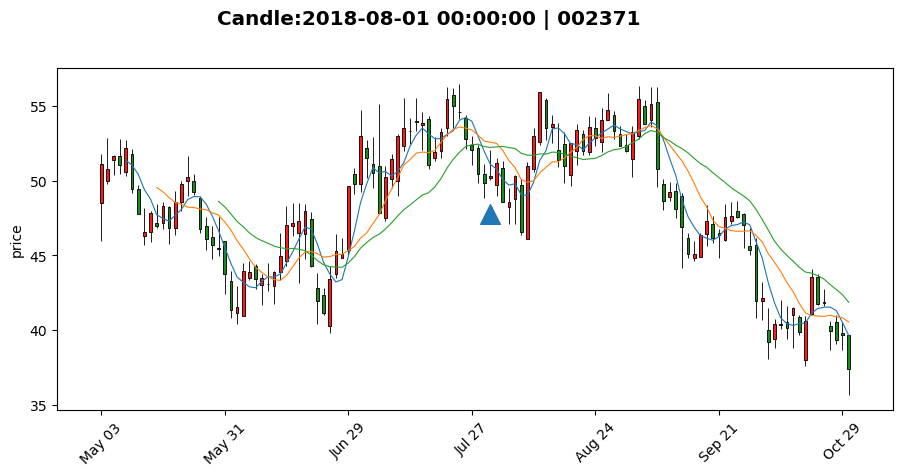

002690 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


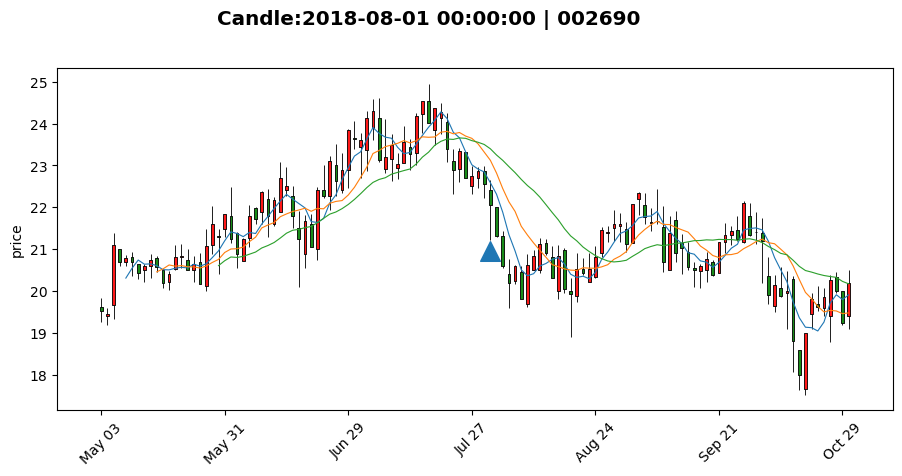

300003 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


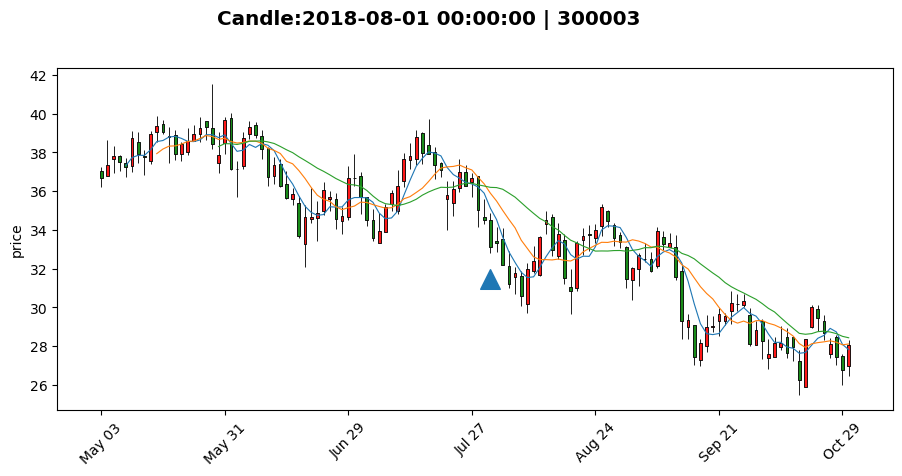

300144 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


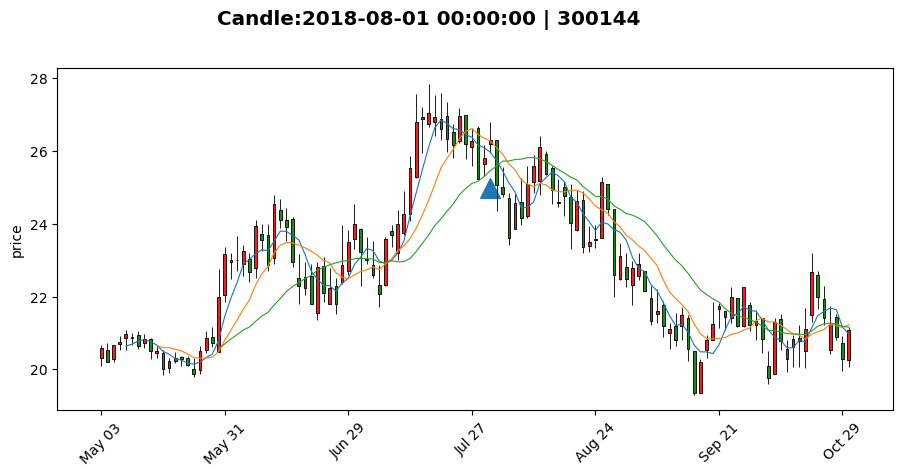

300383 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
107
300408 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


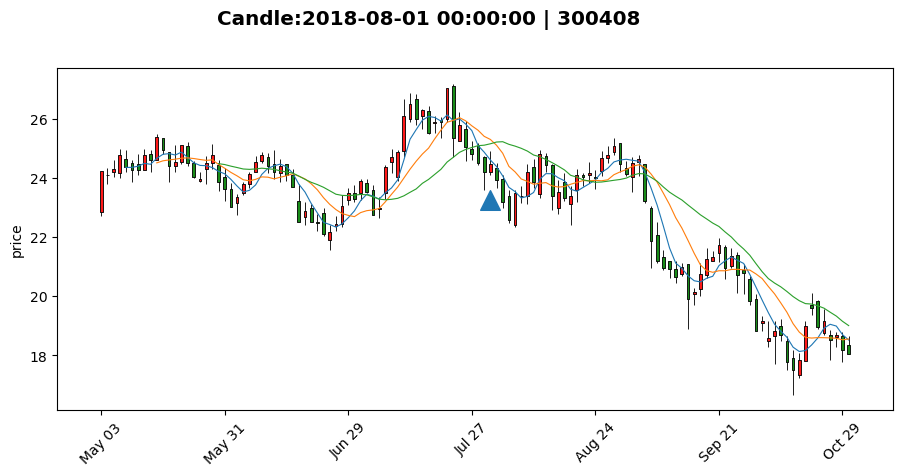

600062 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


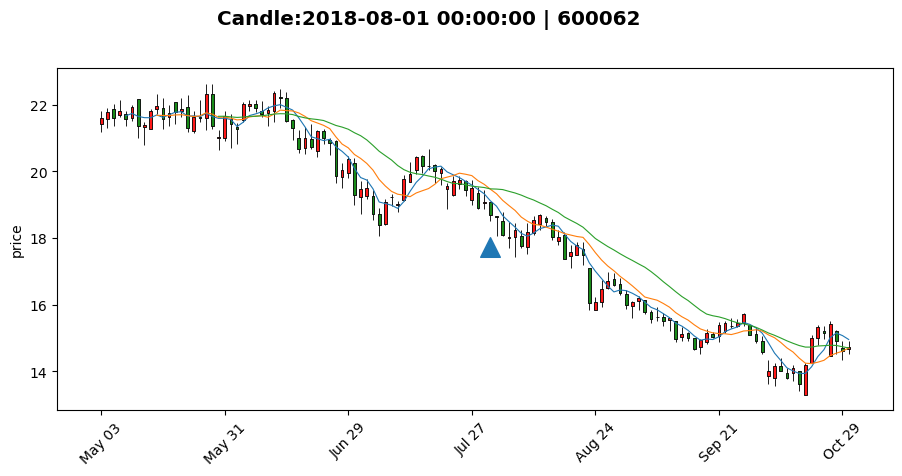

600085 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


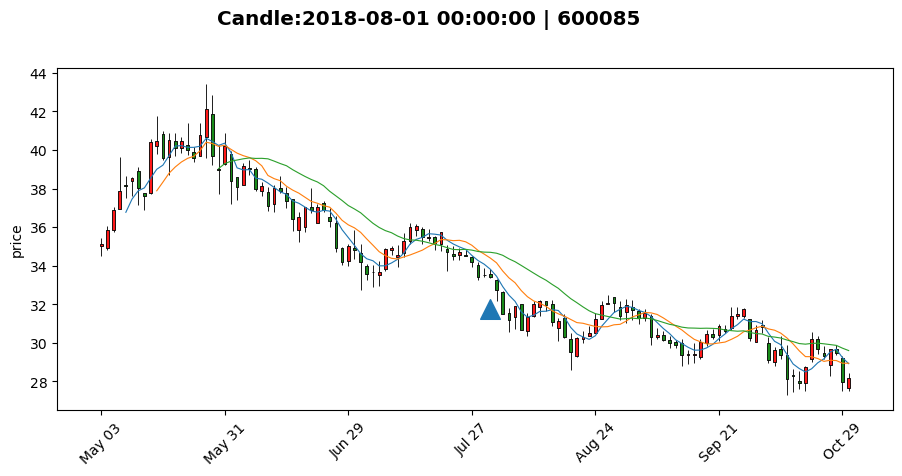

600104 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


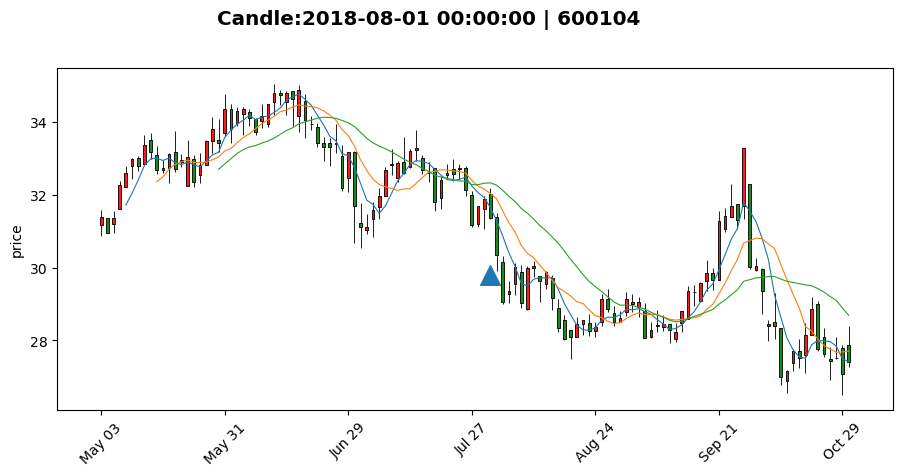

600195 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


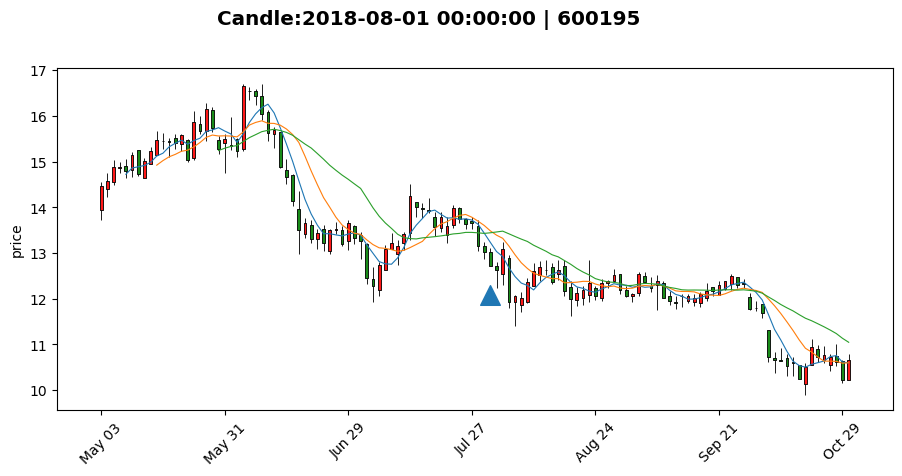

600221 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
67
600258 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


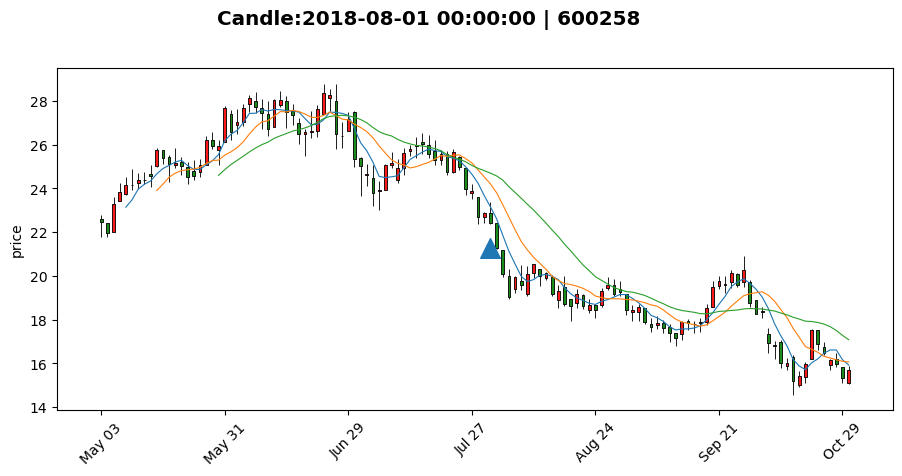

600298 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


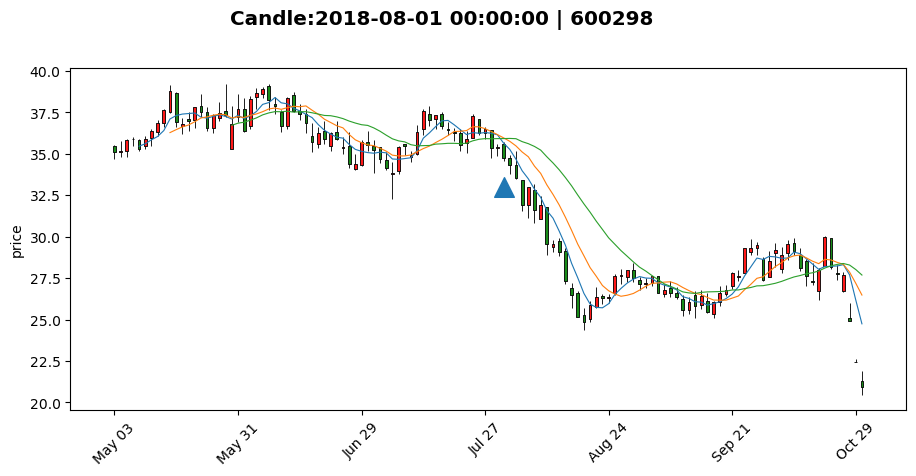

600332 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


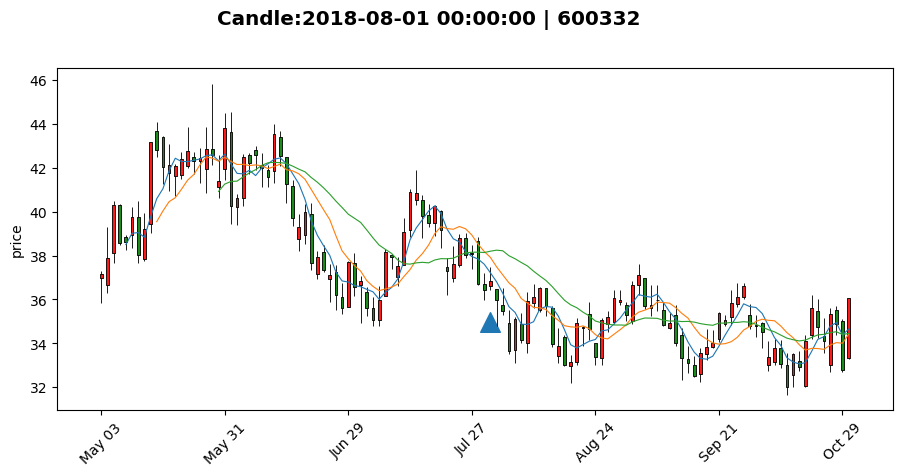

600352 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


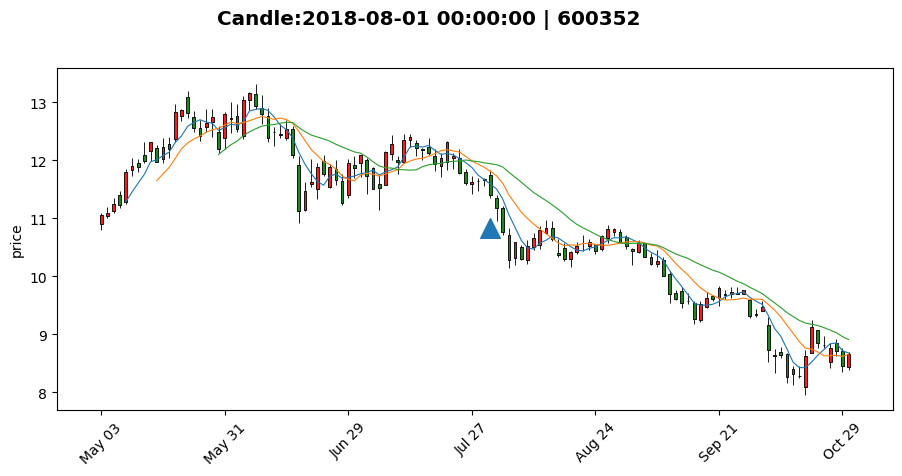

600536 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


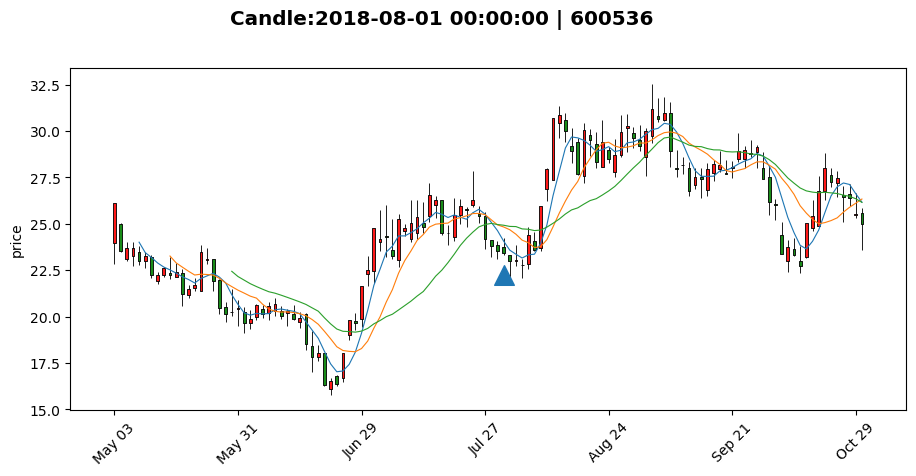

600572 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


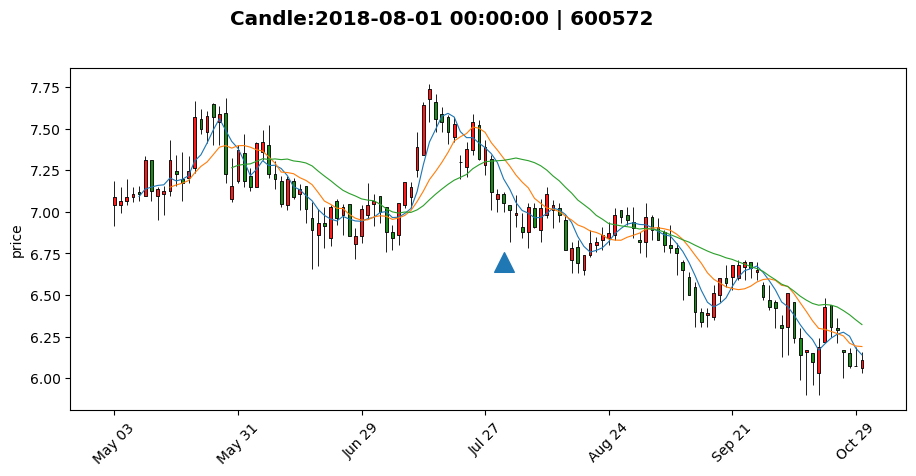

600660 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


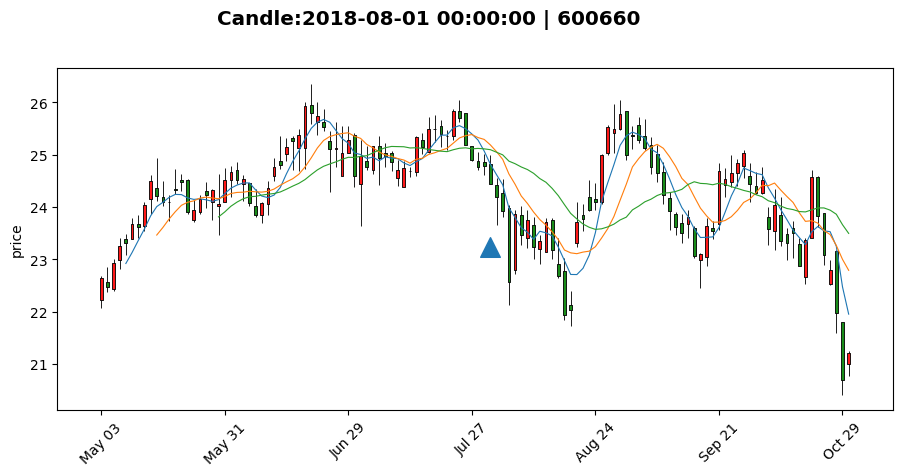

600809 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
<urlopen error timed out>
122


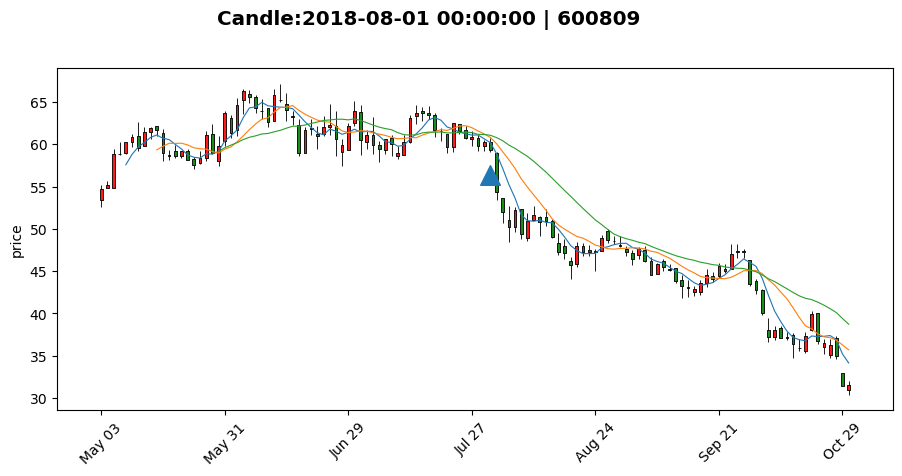

600859 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


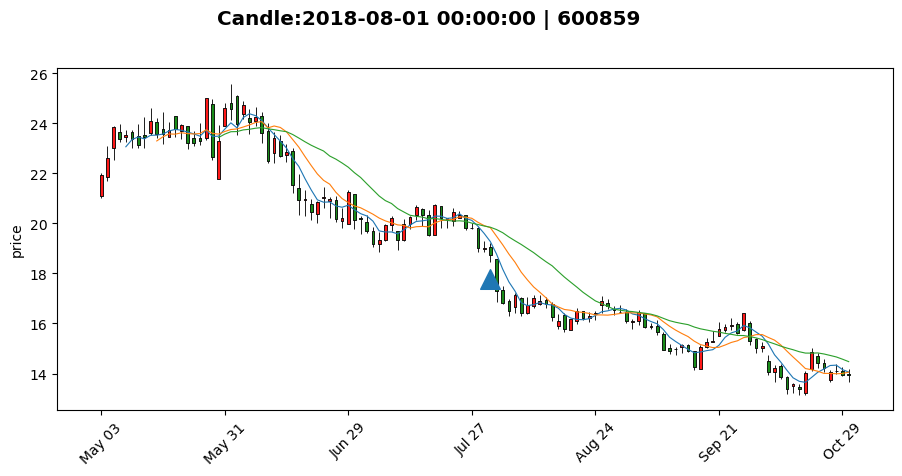

600887 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


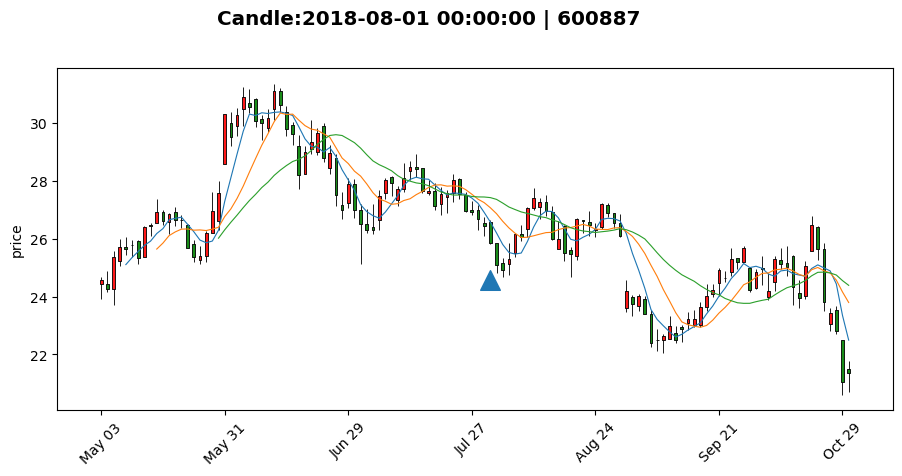

601607 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


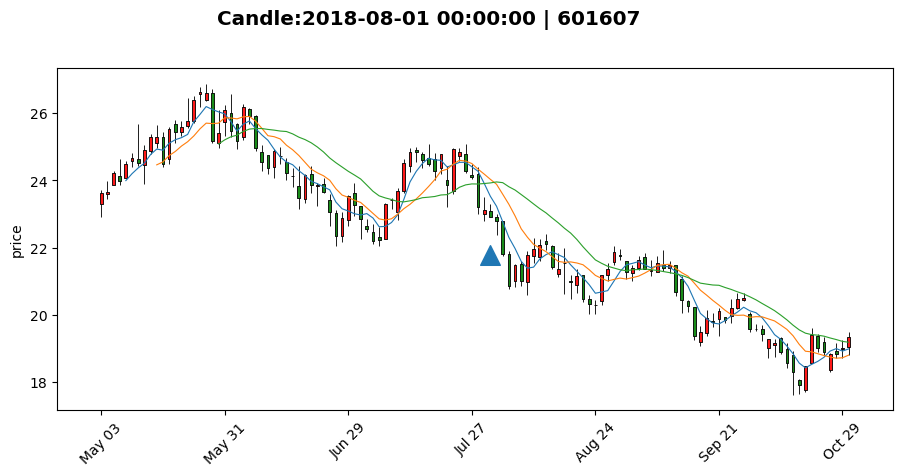

601901 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


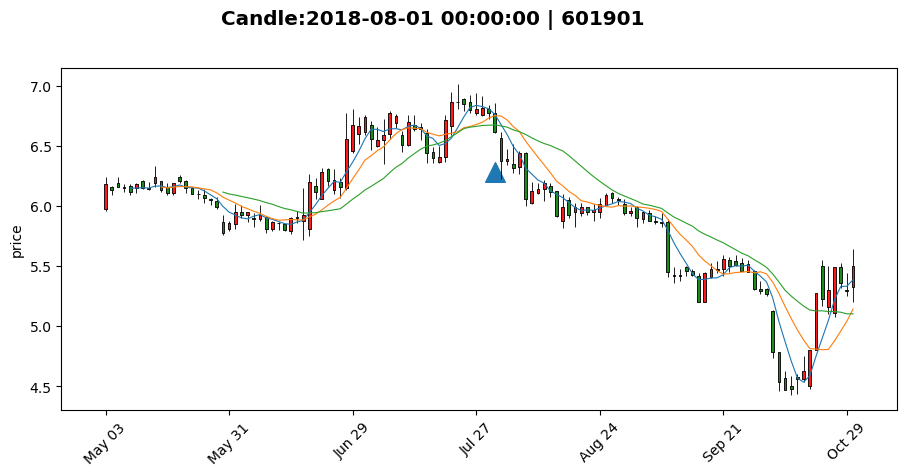

603019 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


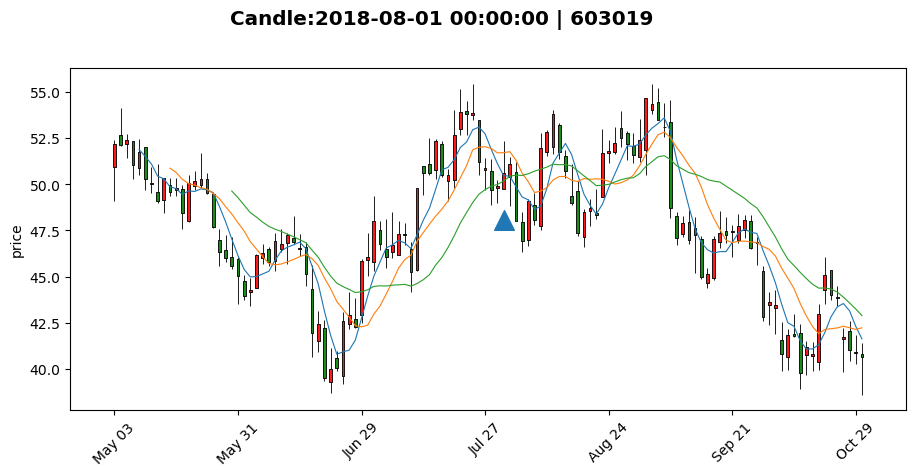

603288 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


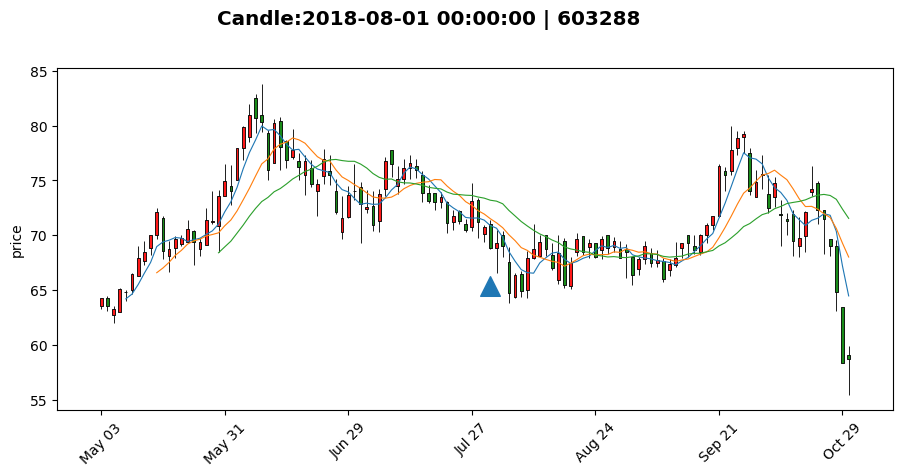

603355 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


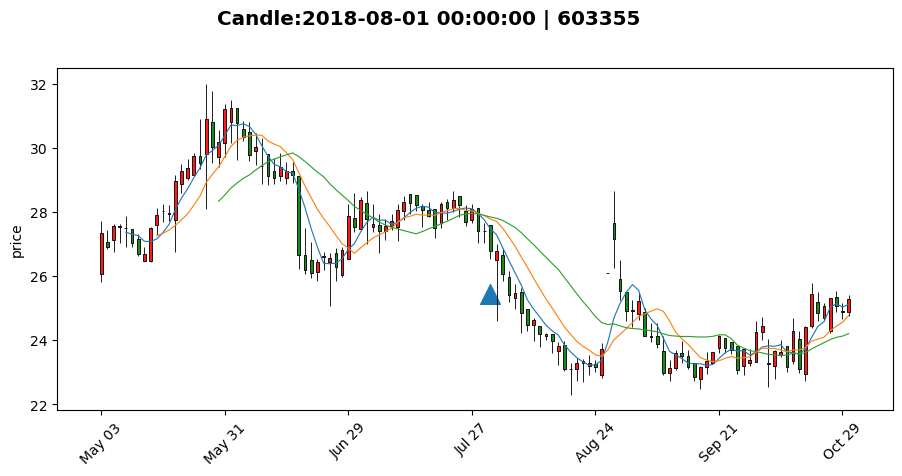

603877 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


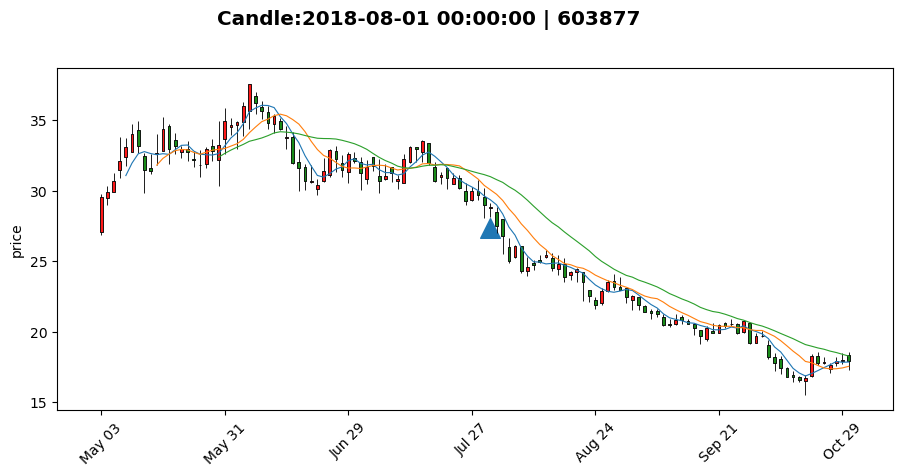

603883 2018-08-01 00:00:00
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
122


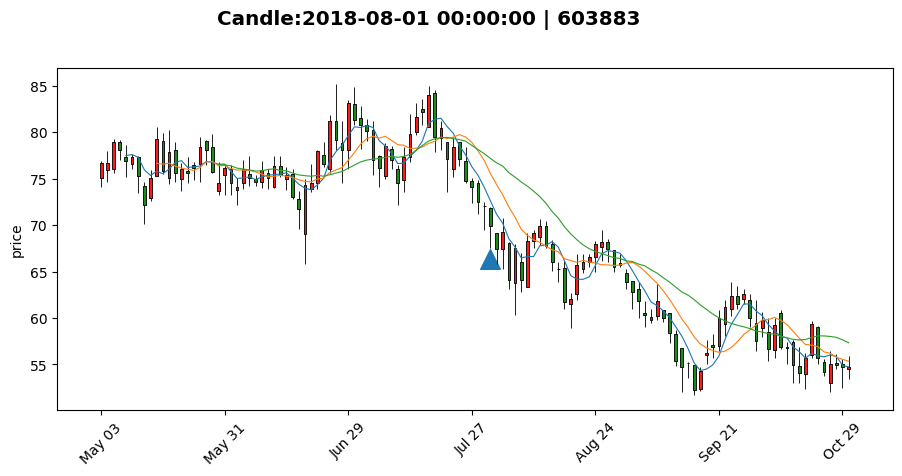

In [30]:
for i in edf.index:
    code = edf.loc[i,'code'][:-5]
    time = edf.loc[i,'time']
#     time = datetime.strptime(time, "%Y-%m-%d").date()
    # 获取 K线图的起始时间
    start = time-timedelta(days=predays)
    # 将起始时间转为字符串
    start = datetime.strftime(start, "%Y-%m-%d")
    # 获取 K线图的终点时间
    end = time+timedelta(days=afterdays)
    # 将终点时间转为字符串
    end = datetime.strftime(end, "%Y-%m-%d")
#     name = get_security_info(code).display_name
    print(code,time)
    drawing(code,start,end,time)